In [52]:
import tensorflow as tf
import numpy as np
import pandas
import os
import matplotlib.pyplot as plt

%matplotlib inline

## Load Training data
dataset = pandas.read_csv("data/ex1data1.txt", header=None)
m,n = dataset.shape
x = dataset.values[:,0].reshape(m,1)
y = dataset.values[:,-1].reshape(m,1)

## Load Validation and Test data

## Normalise
x_norm, mu, sigma = featureNormalise(x)

# Add bias
x_with_bias = np.array([(1., a) for a in x_norm]).astype(np.float32)

In [53]:
def featureNormalise(X):
    mu = np.mean(X)
    sigma = np.std(X, ddof=1)
    return ((X - mu) / sigma), mu, sigma

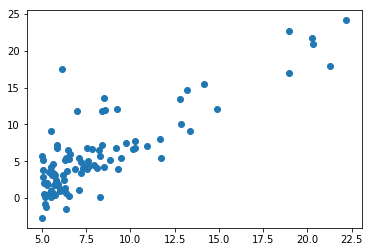

In [54]:
plt.scatter(x,y)

In [55]:
import tensorflow as tf

# We'll bundle groups of examples during training for efficiency.
# This defines the size of the batch.
BATCH_SIZE = m

NUM_FEATURES = 2
NUM_LABELS = 1
# The random seed that defines initialization.
#SEED = 42

# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step, which we'll write once we define the graph structure.
train_data_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, NUM_FEATURES))
train_labels_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, NUM_LABELS))

# The variables below hold all the trainable weights. For each, the
# parameter defines how the variables will be initialized. 
# TODO : These should be pulled from a config file

weights = tf.Variable(tf.random_normal([2, 1],0,0.01))
    
print('Done')

Done


In [63]:
def model(data, train=False):
    """The Model definition."""
    # Linear Regression

    # learning_rate is the step size, so how much we jump from the current spot
    #learning_rate = 0.01

    # The operations in the operation graph.
    # Compute the predicted y values given our current weights
    yhat = tf.matmul(data, weights)
    
    return yhat
    
print('Done')

Done


In [64]:
yhat = model(train_data_node, True)

# How much does this differ from the actual y?
yerror = tf.subtract(yhat, train_labels_node)
# Change the weights by subtracting derivative with respect to that weight
loss = (1.0 / (2 * m)) * tf.reduce_sum(tf.multiply(yerror, yerror))

# Optimizer: 

# Decay 
learning_rate = 0.01
# Gradient Descent
gradient = tf.reduce_sum(tf.transpose(tf.multiply(train_data_node, yerror)), 1, keep_dims=True)
update_weights = tf.assign_sub(weights, (learning_rate / m) * gradient)

# Predictions
train_prediction = yhat

print('Done')

Done


In [66]:
#################
##### Train #####
#################

# Create a new interactive session that we'll use in
# subsequent code cells.
s = tf.InteractiveSession()

# Use our newly created session as the default for 
# subsequent operations.
s.as_default()

# Initialize all the variables we defined above.
tf.global_variables_initializer().run()



# Keep track of the loss at each iteration so we can chart it later
losses = []
# How many iterations to run our training
training_steps = 1500
# The learning rate. Also known has the step size. This changes how far
# we move down the gradient toward lower error at each step. Too large
# jumps risk inaccuracy, too small slow the learning.
learning_rate = 0.01

for _ in range(training_steps):
    # Feed the entire batch
    # Grab the first BATCH_SIZE examples and labels.
    batch_data = x_with_bias[:BATCH_SIZE,:]
    batch_labels = y[:BATCH_SIZE,:]
    
    # This dictionary maps the batch data (as a numpy array) to the
    # node in the graph it should be fed to.
    feed_dict = {train_data_node: batch_data,
                 train_labels_node: batch_labels}
    
    # Run the graph and fetch some of the nodes.
    betas, l, predictions = s.run(
        [update_weights, loss, train_prediction],
        feed_dict=feed_dict)
    
    # Print out the loss periodically.
    losses.append(l)


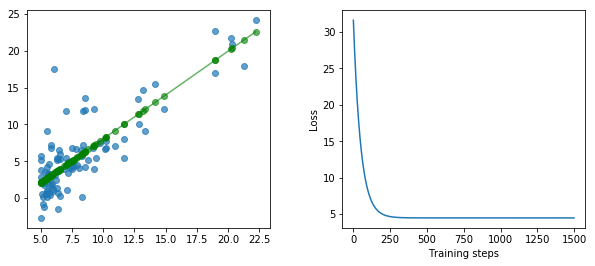

In [67]:
# Show the fit and the loss over time.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(predictions)[0], c="g", alpha=.6)
line_x_range = np.array([min(x), max(x)])
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in ((line_x_range - mu)/sigma)], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()

In [68]:
betas

array([[ 5.83911133],
       [ 4.61687756]], dtype=float32)